In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow  as tf
from tensorflow import keras

## Loading fashion mnist dataset 

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full , y_train_full),(x_test, y_test) = fashion_mnist.load_data()

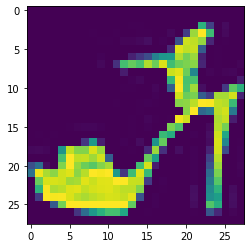

In [58]:
plt.imshow(x_train_full[9])

9

In [59]:
classnames = ["Tshirt/top","Trouser","Pullover","Dress",
              "Coat", "Scandal", "Shirt", "Sneaker"
             ,"Bag", "Ankel Boot"]

In [60]:
classnames[y_train_full[45]]

'Pullover'

# Data Normalization 
simple way to divide with 255 

In [21]:
x_train_n = x_train_full/255
x_test_n = x_test / 255

### Spliting the data into train & validation & test datasets

In [24]:
x_valid , x_train = x_train_n[:5000], x_train_n[5000:]
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

In [31]:
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [38]:
model_history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7013 - accuracy: 0.7692 - val_loss: 0.5177 - val_accuracy: 0.8196
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4859 - accuracy: 0.8298 - val_loss: 0.4351 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4429 - accuracy: 0.8438 - val_loss: 0.5379 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4163 - accuracy: 0.8550 - val_loss: 0.3959 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3979 - accuracy: 0.8614 - val_loss: 0.3796 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3791 - accuracy: 0.8666 - val_loss: 0.3724 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3667 - accuracy: 0.8716 - val_loss: 0.3627 - val_ac

In [39]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [40]:
model_history.history


{'loss': [0.7013289928436279,
  0.4859303832054138,
  0.44291675090789795,
  0.41632166504859924,
  0.39791008830070496,
  0.3790888488292694,
  0.3667096197605133,
  0.35533079504966736,
  0.3447151780128479,
  0.33579665422439575,
  0.32712864875793457,
  0.3176653981208801,
  0.31074759364128113,
  0.3045860826969147,
  0.2968118190765381,
  0.29174116253852844,
  0.2866109609603882,
  0.2804119288921356,
  0.27546823024749756,
  0.2703888714313507,
  0.26552698016166687,
  0.26062753796577454,
  0.25621968507766724,
  0.25212362408638,
  0.24802497029304504,
  0.24356237053871155,
  0.2399066537618637,
  0.23605553805828094,
  0.23213359713554382,
  0.22886812686920166],
 'accuracy': [0.7692363858222961,
  0.829800009727478,
  0.843818187713623,
  0.8550181984901428,
  0.8613636493682861,
  0.8665817975997925,
  0.8715636134147644,
  0.8746181726455688,
  0.8789818286895752,
  0.8806909322738647,
  0.883472740650177,
  0.8859454393386841,
  0.8892182111740112,
  0.8910727500915527,

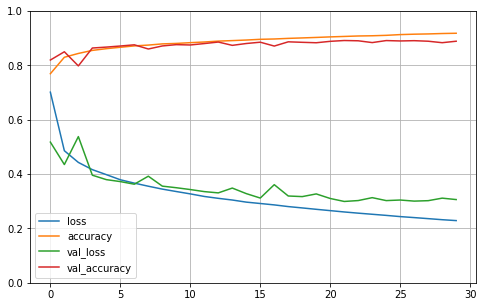

In [41]:

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
X_new = x_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [62]:
np.array(classnames)[y_pred]

array(['Ankel Boot', 'Pullover', 'Trouser'], dtype='<U10')

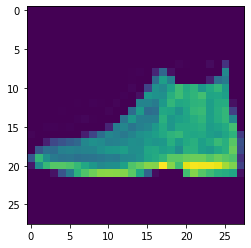

In [63]:
plt.imshow(X_new[0])